In [1]:
# imports
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
# trying to load one file's data in
matfile = loadmat("../data/raw/Ach-AT/00_0315_ach-at_0.mat")

# combine the MEA data into one data frame
data = pd.DataFrame(matfile['filt_data'])
data = data.T
time = pd.DataFrame(matfile['filt_t'])
time = time.T
time.columns = ['time']

df_ts = pd.concat([time, data], axis=1)
df_ts = df_ts.set_index('time')
df_ts = df_ts.reset_index()

In [46]:
length = 6000
win = 1
ids = pd.DataFrame(index=df_ts.index)
for i in range(0,len(df_ts),length):
    ids.loc[i:i+length,'id'] = win
    win += 1
df_ts.insert(1, 'id', ids)

In [51]:
df_ts['id'].tail(1).values[0]

30.0

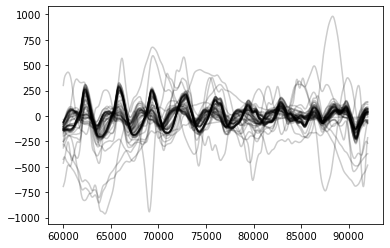

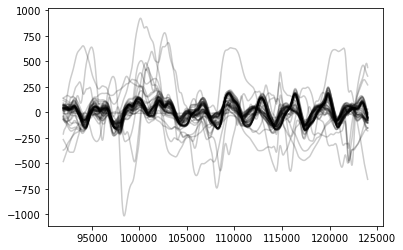

In [10]:
# what does the signal data look like on one chart
df_window = df_ts.iloc[0:32000, :]
plt.plot(df_window, 'k', alpha = 0.2)
plt.show()
df_window = df_ts.iloc[32000:64000, :]
plt.plot(df_window, 'k', alpha = 0.2)
plt.show()

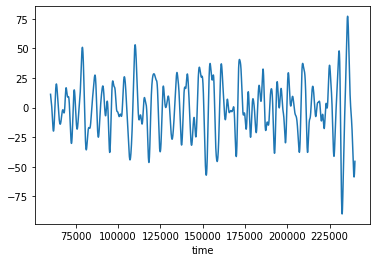

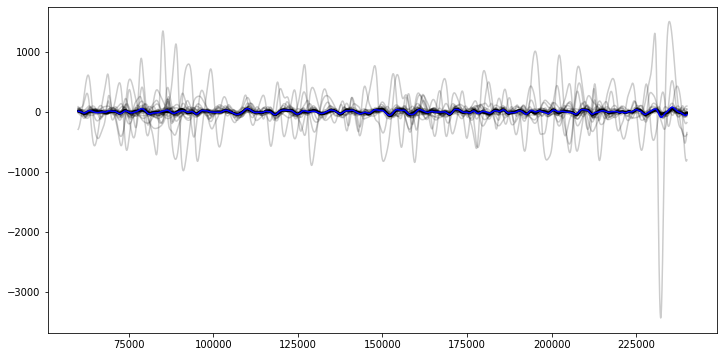

In [31]:
# what does the mean signal look like
ts_mean = df_ts.iloc[:,1:].mean(axis=1)

# overlay this plot on the all the signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_ts, 'k', alpha=0.2)
ax.plot(ts_mean, 'b')

The mean signal has a very low amplitude relative to the largest amplitude signals in the micro-electrode array, but it seemes to match the bulk of the signals fairly well. I'll proceed with using the mean as a proxy for the whole MEA for each subject.

In [32]:
# writing a method to load all the data from .mat files
## def load_MEA_data():

# get a list of the file names
d = "data/raw/"
filenames = []

for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".mat"):
            filenames.append(os.path.join(root, file))

# initialise time vectors
t0 = {'time': np.arange(60001, 240001, 1)}
t1 = {'time': np.arange(420001, 600001, 1)}
t2 = {'time': np.arange(780001, 960001, 1)}

# set up dataframes to add the values into
# baseline (0), first drug administered (1), second drug administered (2)

df_baseline = pd.DataFrame(t0)
df_first = pd.DataFrame(t1)
df_second = pd.DataFrame(t2)

for file in filenames:
    matfile = loadmat(file)
    MEA_data = pd.DataFrame(matfile['filt_data'])
    MEA_mean = pd.DataFrame(MEA_data.mean(axis=0))

    # the name of the file will be the column header
    colname = os.path.split(file)[1]
    colname = colname[:-4]
    MEA_mean.columns = [colname]

    # concatenate appropriate dataframe
    if colname.endswith("0"):
        df_baseline = pd.concat([df_baseline, MEA_mean], axis=1)
    elif colname.endswith("1"):
        df_first = pd.concat([df_first, MEA_mean], axis=1)
    else:
        df_second = pd.concat([df_second, MEA_mean], axis=1)

In [34]:
# NEXT STEPS: EXPORT DATAFRAMES TO CSV IN data/interim
export_path = "data/interim/"
df_baseline.to_csv(export_path+"baseline_means.csv")
df_first.to_csv(export_path+"first_means.csv")
df_second.to_csv(export_path+"second_means.csv")


We have reduced the size of the data considerably, all 3 files combine to be 172 MB

In [8]:
data = pd.DataFrame(ach_at_baseline['filt_data'])
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-135.904409,-126.704873,-129.462254,-121.519825,-124.371209,-102.553959,-426.883940,-103.540012,-293.788800,-112.217772,...,-127.200097,-117.265941,-140.741374,-136.679302,-182.152656,-145.942890,-145.357315,-137.695972,-143.410471,-141.207962
1,-135.970862,-126.796326,-129.559494,-121.627592,-124.485424,-102.687438,-426.496982,-103.706237,-293.582639,-112.378517,...,-127.204563,-117.290073,-140.782349,-136.725187,-181.736284,-145.996543,-145.411239,-137.754658,-143.477315,-141.291289
2,-136.036568,-126.887027,-129.655970,-121.734591,-124.598914,-102.820126,-426.112029,-103.871656,-293.377845,-112.538494,...,-127.208303,-117.313468,-140.822649,-136.770327,-181.322447,-146.049450,-145.464410,-137.812580,-143.543406,-141.373857
3,-136.101527,-126.976977,-129.751683,-121.840824,-124.711680,-102.952022,-425.729129,-104.036270,-293.174450,-112.697702,...,-127.211317,-117.336128,-140.862274,-136.814723,-180.911182,-146.101611,-145.516827,-137.869738,-143.608744,-141.455666
4,-136.165739,-127.066176,-129.846632,-121.946291,-124.823721,-103.083127,-425.348329,-104.200076,-292.972489,-112.856141,...,-127.213606,-117.358052,-140.901224,-136.858376,-180.502526,-146.153025,-145.568492,-137.926133,-143.673330,-141.536716
